In [87]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
#Importing scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression # This import should work now
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer

In [95]:
df = pd.read_csv('train.csv')

In [101]:
df.head()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Education,LoanAmount,Property_Area,Loan_Status
0,Male,No,No,5849.0,0.0,360.0,1.0,LP001002,0,Graduate,146.412162,Urban,Y
1,Male,Yes,No,4583.0,1508.0,360.0,1.0,LP001003,1,Graduate,128.0,Rural,N
2,Male,Yes,Yes,3000.0,0.0,360.0,1.0,LP001005,0,Graduate,66.0,Urban,Y
3,Male,Yes,No,2583.0,2358.0,360.0,1.0,LP001006,0,Not Graduate,120.0,Urban,Y
4,Male,No,No,6000.0,0.0,360.0,1.0,LP001008,0,Graduate,141.0,Urban,Y


## Features:
- **ApplicantIncome**: Monthly income of the applicant.
- **CoapplicantIncome**: Monthly income of the co-applicant.
- **LoanAmount**: Requested loan amount.
- **Loan_Amount_Term**: Loan repayment term (in months).
- **Credit_History**: 1 if the applicant has a good credit history, 0 otherwise.
- **Gender**: Male/Female.
- **Married**: Yes/No.
- **Dependents**: Number of dependents.
- **Education**: Graduate/Not Graduate.
- **Property_Area**: Urban/Rural/Semi-Urban.

## Target Variable:
- **Loan_Status**:
  - `1` (Approved)
  - `0` (Rejected)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [111]:
df.isnull().sum()

,0
Gender,0
Married,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0
Credit_History,0
Loan_ID,0
Dependents,15
Education,0


Handling Missing Values

In [97]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [112]:
from sklearn.compose import ColumnTransformer

# Define the column names for categorical and numerical features
categorical_features_names = ['Gender','Dependents','Married','Self_Employed']
numerical_features_names = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

# Create SimpleImputer objects for each type of feature
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='most_frequent')

# Create the ColumnTransformer using the column names and imputers
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_imputer, categorical_features_names),
        ('num', numerical_imputer, numerical_features_names)
    ],
    remainder='passthrough'
)

# Apply the transformation
df_transformed = preprocessor.fit_transform(df)

# Reconstruct the DataFrame with appropriate column names
df = pd.DataFrame(df_transformed, columns=categorical_features_names + numerical_features_names + df.drop(categorical_features_names + numerical_features_names, axis=1).columns.tolist())

# Ensure correct data types for columns
for col in categorical_features_names + numerical_features_names:
    df[col] = df[col].astype(df[col].dtype)

In [103]:
df.head()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Education,LoanAmount,Property_Area,Loan_Status
0,Male,No,No,5849.0,0.0,360.0,1.0,LP001002,0,Graduate,146.412162,Urban,Y
1,Male,Yes,No,4583.0,1508.0,360.0,1.0,LP001003,1,Graduate,128.0,Rural,N
2,Male,Yes,Yes,3000.0,0.0,360.0,1.0,LP001005,0,Graduate,66.0,Urban,Y
3,Male,Yes,No,2583.0,2358.0,360.0,1.0,LP001006,0,Not Graduate,120.0,Urban,Y
4,Male,No,No,6000.0,0.0,360.0,1.0,LP001008,0,Graduate,141.0,Urban,Y


In [113]:
# Convert the 'LoanAmount' column to a numeric data type
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')

# Now apply the square root transformation, handling potential NaNs
df['LoanAmount'] = df['LoanAmount'].apply(lambda x: np.sqrt(x + 1) if pd.notna(x) else x)

# Similarly for 'ApplicantIncome'
df['ApplicantIncome'] = pd.to_numeric(df['ApplicantIncome'], errors='coerce')
df['ApplicantIncome'] = df['ApplicantIncome'].apply(lambda x: np.sqrt(x + 1) if pd.notna(x) else x)

Handling outliers


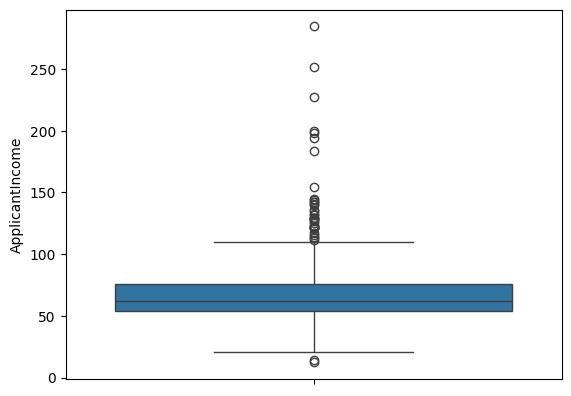

In [114]:
sns.boxplot(df['ApplicantIncome'])
plt.show()

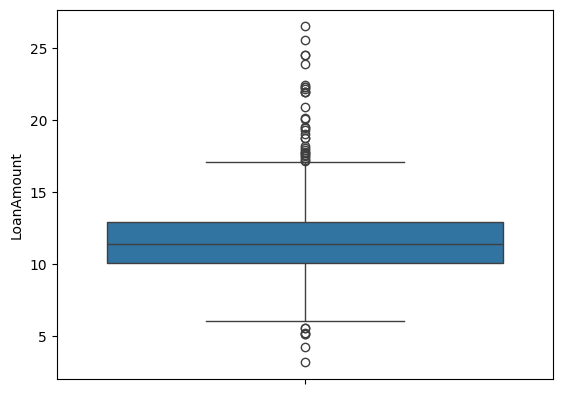

In [115]:
sns.boxplot(df['LoanAmount'])
plt.show()

In [116]:
df['LoanAmount'].skew()

1.324874689334041

In [117]:
df['ApplicantIncome'].skew()

2.967692722896689

In [118]:
df['LoanAmount'] = np.sqrt(df['LoanAmount'] + 1)  # Adding 1 to avoid issues with zeros
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'] + 1)  # Adding 1 to avoid issues with zeros


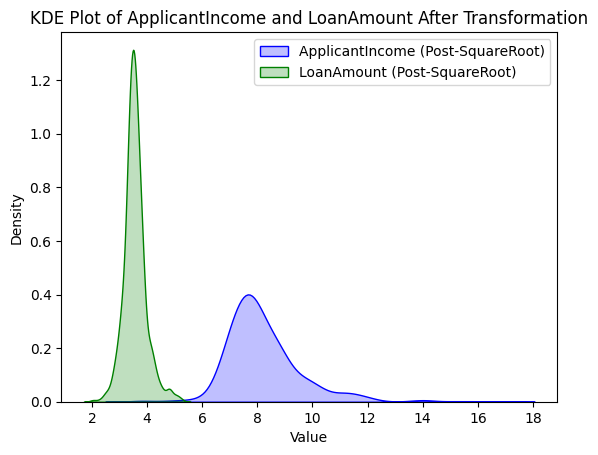

In [119]:
# KDE Plot for both features after square root transformation
sns.kdeplot(df['ApplicantIncome'], shade=True, color="blue", label="ApplicantIncome (Post-SquareRoot)")
sns.kdeplot(df['LoanAmount'], shade=True, color="green", label="LoanAmount (Post-SquareRoot)")

plt.title('KDE Plot of ApplicantIncome and LoanAmount After Transformation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [120]:
# Checking skewness after log transformation
print(f"Skewness of ApplicantIncome: {df['ApplicantIncome'].skew()}")
print(f"Skewness of LoanAmount: {df['LoanAmount'].skew()}")

Skewness of ApplicantIncome: 1.6985955295545343
Skewness of LoanAmount: 0.6664329219145295


Scaling the numerical features

In [121]:
#Standard scaling for the numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Encoding Categorical features

In [122]:
# Encoding Education to label encoding

Label_encoder = LabelEncoder()
df['Education'] = Label_encoder.fit_transform(df['Education'])
df['Loan_Status'] = Label_encoder.fit_transform(df['Loan_Status'])

In [123]:
# One hotencoding for Gender & Property area
df = pd.get_dummies(df, columns=['Gender', 'Property_Area'], drop_first=True)

In [124]:
# Convert 'Yes' and 'No' to 1 and 0 before using astype('Int64')
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0}).astype('Int64')
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0}).astype('Int64')

In [125]:
# Convert True/False to 1/0 for One-Hot Encoded columns
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].astype(int)
df['Property_Area_Urban'] = df['Property_Area_Urban'].astype(int)

In [126]:
df.head()

,Dependents,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Education,Loan_Status,Gender_Male,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0.417446,-0.554487,0.184944,0.273231,0.411733,LP001002,0,1,1,0,1
1,1,1,0,0.049986,-0.038732,-0.087761,0.273231,0.411733,LP001003,0,0,1,0,0
2,0,1,1,-0.536685,-0.554487,-1.292191,0.273231,0.411733,LP001005,0,1,1,0,1
3,0,1,0,-0.729227,0.251980,-0.215172,0.273231,0.411733,LP001006,1,1,1,0,1
4,0,0,0,0.457172,-0.554487,0.107497,0.273231,0.411733,LP001008,0,1,1,0,1


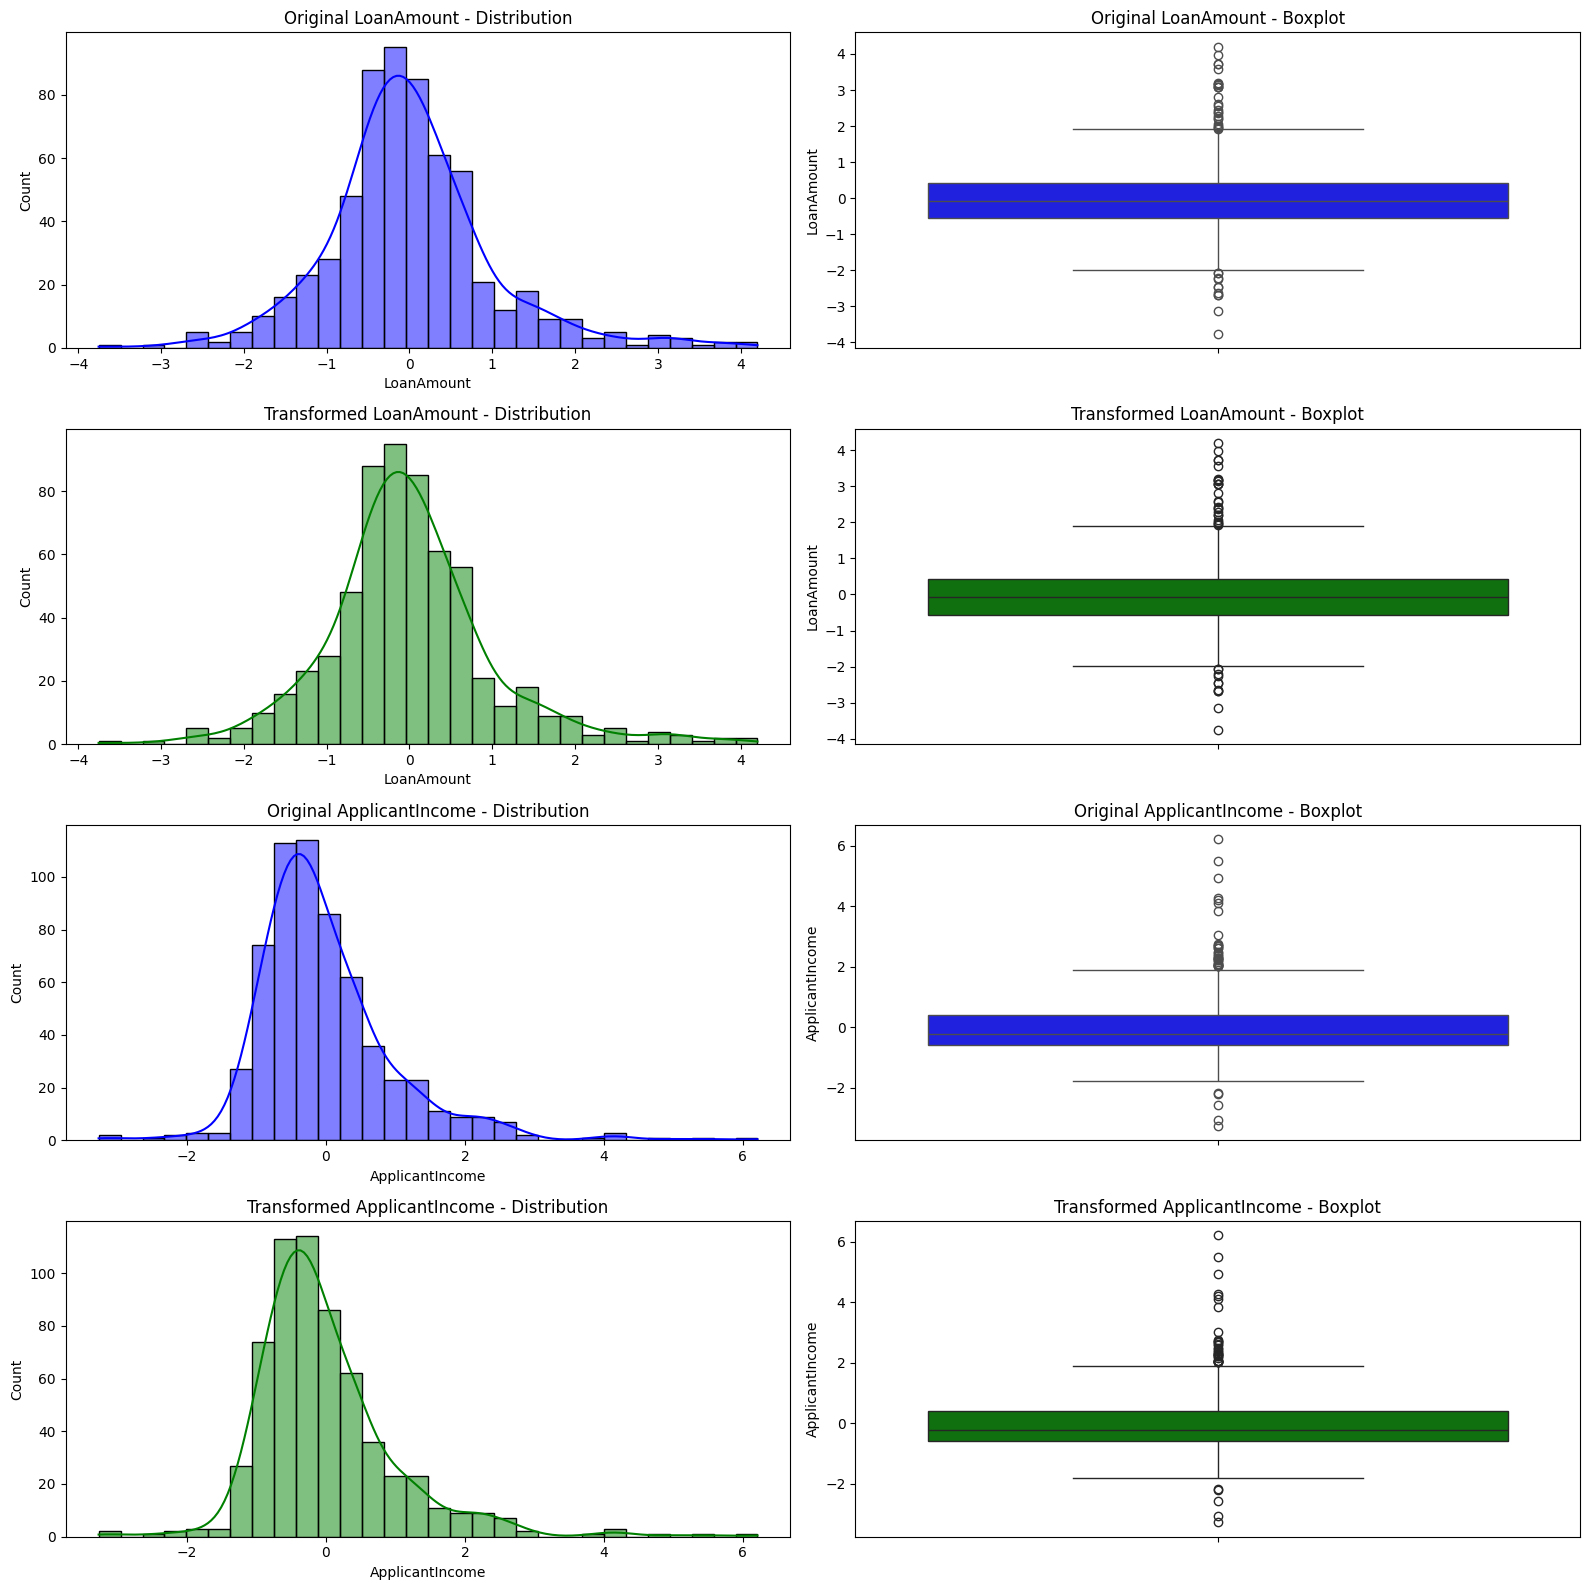

In [127]:
# Comparison of LoanAmount and ApplicantIncome before and after transformation
plt.figure(figsize=(16, 16))

# Original LoanAmount Distribution
plt.subplot(4, 2, 1)
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='blue')
plt.title('Original LoanAmount - Distribution')
plt.xlabel('LoanAmount')

# Original LoanAmount Boxplot
plt.subplot(4, 2, 2)
sns.boxplot(y=df['LoanAmount'], color='blue')
plt.title('Original LoanAmount - Boxplot')
plt.ylabel('LoanAmount')

# Transformed LoanAmount Distribution
plt.subplot(4, 2, 3)
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='green')
plt.title('Transformed LoanAmount - Distribution')
plt.xlabel('LoanAmount')

# Transformed LoanAmount Boxplot
plt.subplot(4, 2, 4)
sns.boxplot(y=df['LoanAmount'], color='green')
plt.title('Transformed LoanAmount - Boxplot')
plt.ylabel('LoanAmount')

# Original ApplicantIncome Distribution
plt.subplot(4, 2, 5)
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Original ApplicantIncome - Distribution')
plt.xlabel('ApplicantIncome')

# Original ApplicantIncome Boxplot
plt.subplot(4, 2, 6)
sns.boxplot(y=df['ApplicantIncome'], color='blue')
plt.title('Original ApplicantIncome - Boxplot')
plt.ylabel('ApplicantIncome')

# Transformed ApplicantIncome Distribution
plt.subplot(4, 2, 7)
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='green')
plt.title('Transformed ApplicantIncome - Distribution')
plt.xlabel('ApplicantIncome')

# Transformed ApplicantIncome Boxplot
plt.subplot(4, 2, 8)
sns.boxplot(y=df['ApplicantIncome'], color='green')
plt.title('Transformed ApplicantIncome - Boxplot')
plt.ylabel('ApplicantIncome')

# Show the plots
plt.tight_layout()
plt.show()


Visualizing correlations between features and the target variable

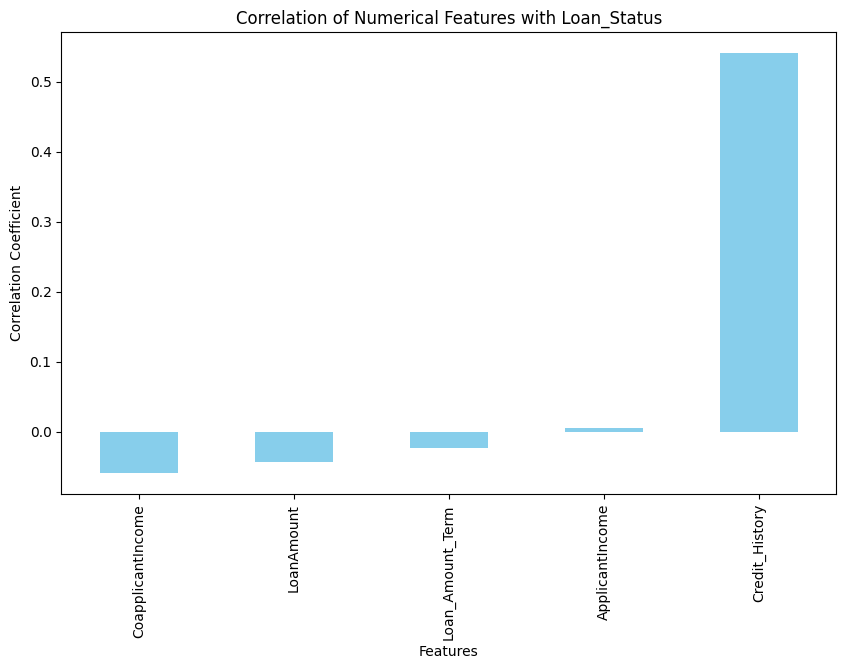

In [128]:
correlations = df[numerical_features + ['Loan_Status']].corr()['Loan_Status'].drop('Loan_Status')

# Bar plot for numerical correlations
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlation of Numerical Features with Loan_Status')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')

plt.show()

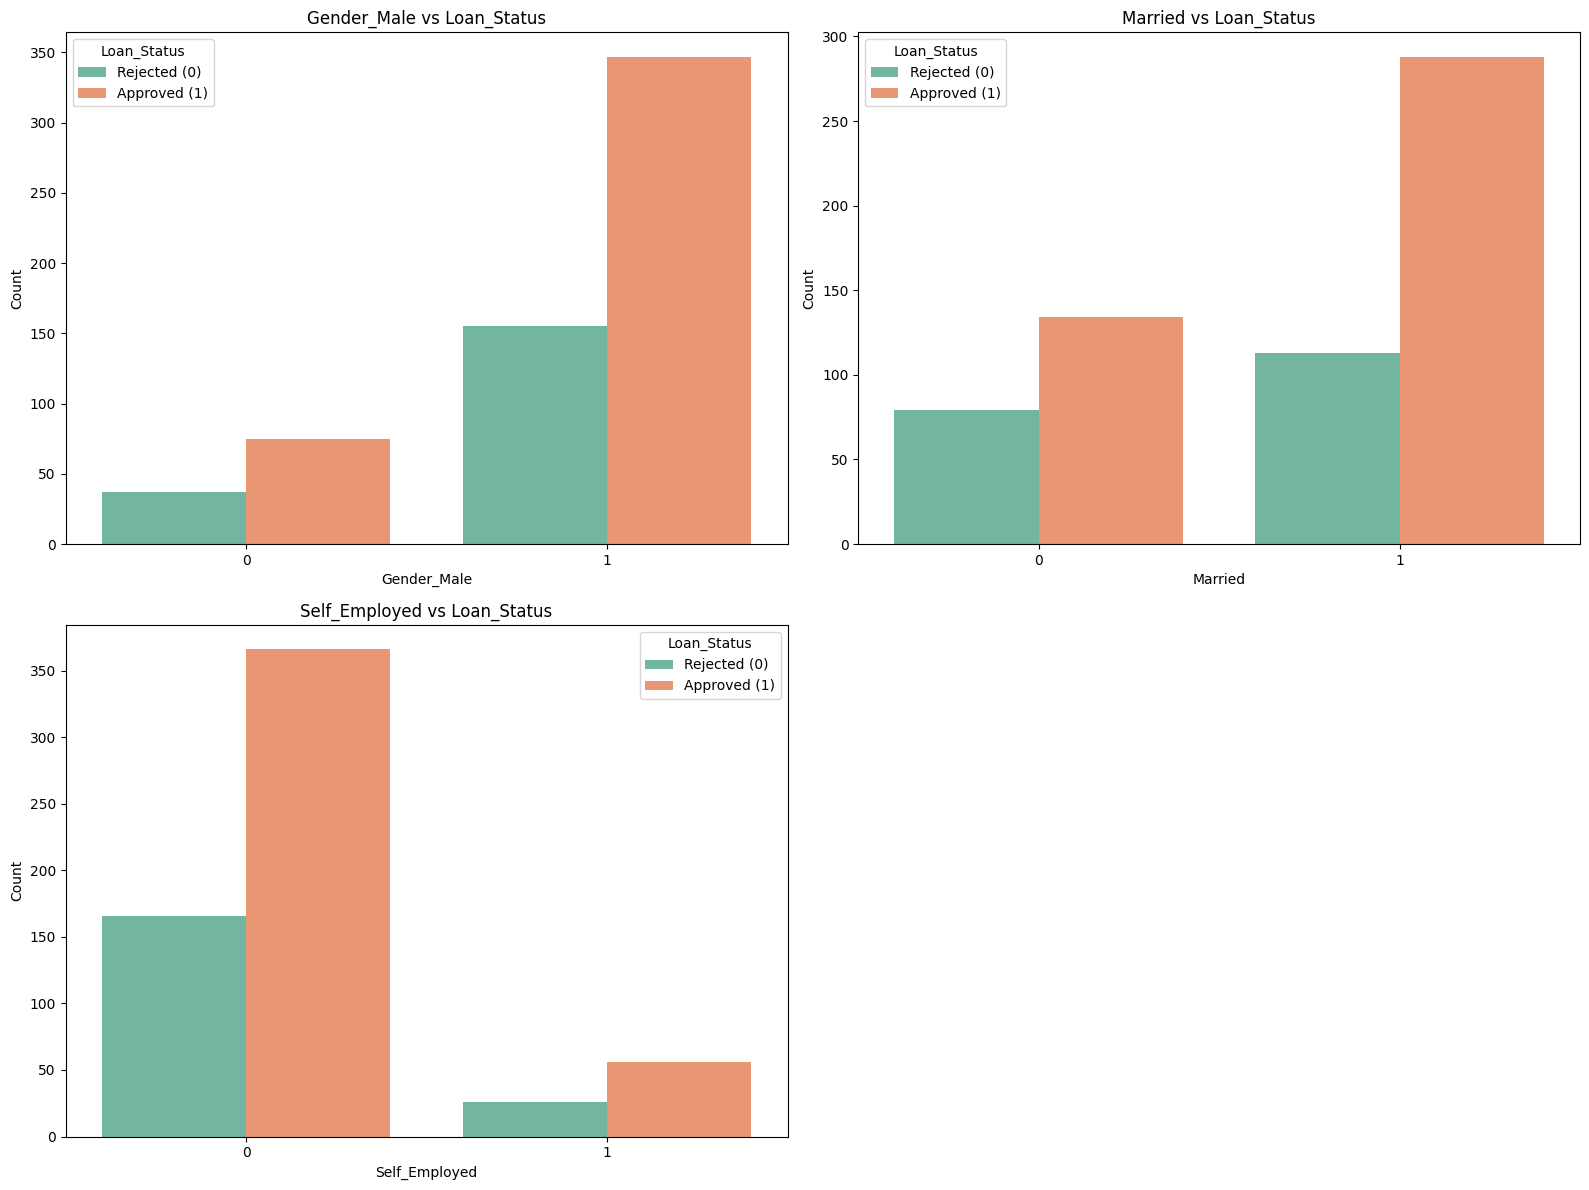

In [129]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Define the column names for categorical features
# Update categorical_features_names to reflect one-hot encoded columns
categorical_features_names = ['Gender_Male', 'Married', 'Self_Employed']

# Number of rows and columns for subplots
n_features = len(categorical_features_names)
rows = math.ceil(n_features / 2)  # Calculate rows dynamically for a 2-column layout

plt.figure(figsize=(16, 6 * rows))  # Adjust height based on number of rows
for i, feature in enumerate(categorical_features_names, 1):
    plt.subplot(rows, 2, i)
    sns.countplot(data=df, x=feature, hue='Loan_Status', palette='Set2')
    plt.title(f'{feature} vs Loan_Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status', labels=['Rejected (0)', 'Approved (1)'])

plt.tight_layout()
plt.show()

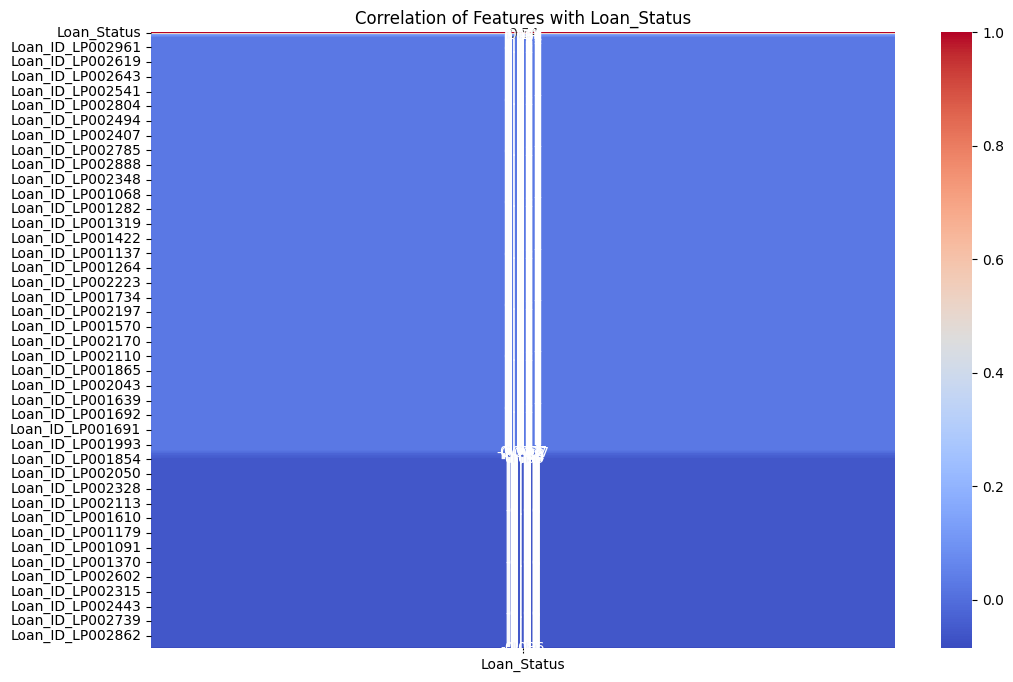

In [130]:
# Encode categorical features for correlation computation
encoded_df = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
correlation_matrix = encoded_df.corr()

# Heatmap of correlations with Loan_Status
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Loan_Status']].sort_values(by='Loan_Status', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Loan_Status')
plt.show()


In [131]:
#Combinig applicat income and co aplicant in come ---> Total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [132]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [166]:
# Drop the Loan_ID column from the dataset
df = df.drop(columns=['Loan_ID'], errors='ignore')


#Train test split

In [167]:
#train test split
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [168]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 11)
X_test shape: (123, 11)
y_train shape: (491,)
y_test shape: (123,)


In [169]:
# Drop the Loan_ID column
X_train = X_train.drop(columns=['Loan_ID'], errors='ignore')
X_test = X_test.drop(columns=['Loan_ID'], errors='ignore')


In [147]:
# Train an SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [149]:
# Predict on test data
y_pred = svm_model.predict(X_test)

In [150]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7723577235772358

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



Text(45.722222222222214, 0.5, 'Actual')

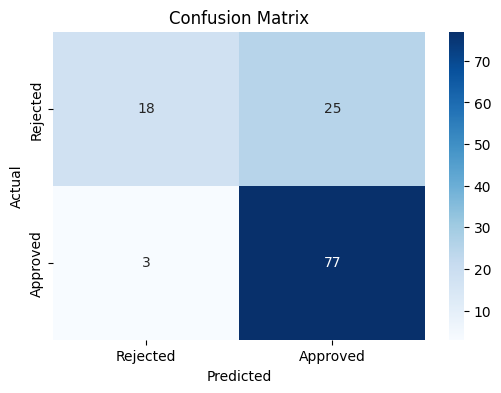

In [153]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    object 
 1   Married                  614 non-null    Int64  
 2   Self_Employed            614 non-null    Int64  
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_ID                  614 non-null    object 
 7   Education                614 non-null    int64  
 8   Loan_Status              614 non-null    int64  
 9   Gender_Male              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    int64  
 11  Property_Area_Urban      614 non-null    int64  
 12  Total_Income             614 non-null    float64
dtypes: Int64(2), float64(4), int64(5), object(2)
memory usage: 63.7+ KB


Hyper parametr tuning

In [155]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel type
}
from sklearn.svm import SVC # Import SVC

# Perform GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test)

print("\nAccuracy (Tuned Model):", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy (Tuned Model): 0.7886178861788617

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



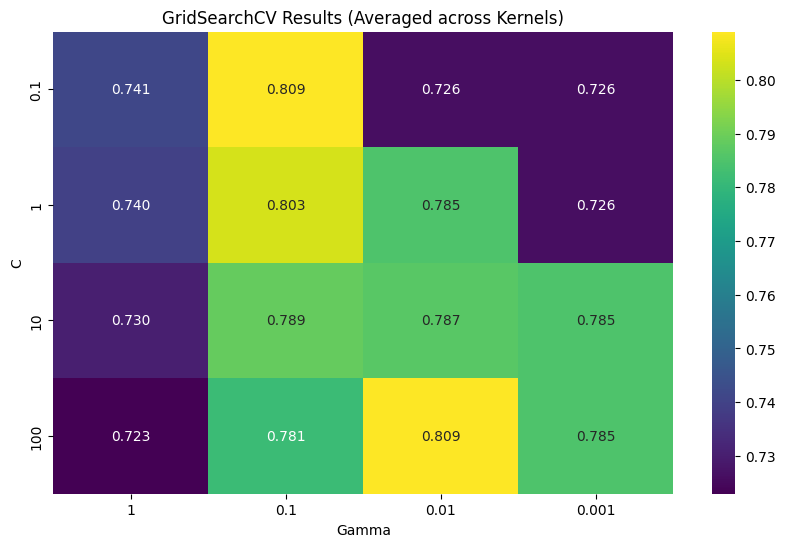

In [157]:
results = grid_search.cv_results_

# Reshape based on all parameter combinations
scores = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']), len(param_grid['kernel']))

# Average scores across kernels to get a 4x4 matrix
scores = scores.mean(axis=2)  # Average along the 'kernel' dimension

# Heatmap of C vs gamma (averaged across kernels)
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, fmt='.3f', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')
plt.title("GridSearchCV Results (Averaged across Kernels)")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()

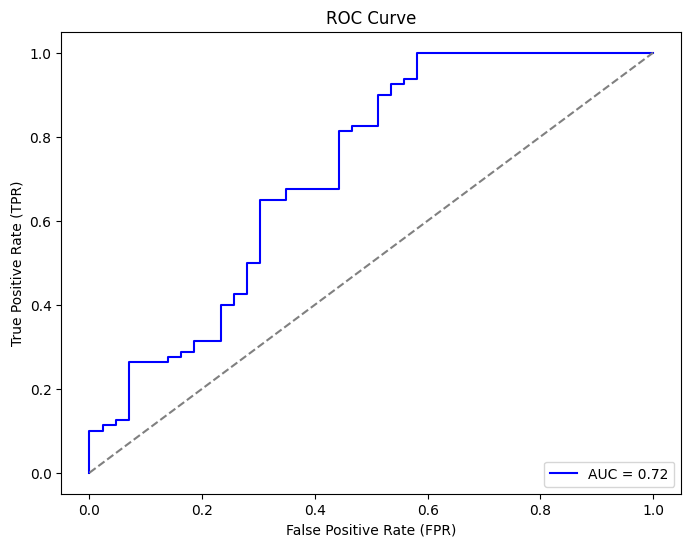

In [161]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for positive class
y_probs = svm_model.decision_function(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()



Predication for new data

In [171]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example new data (replace with actual new data)
new_data = pd.DataFrame({
    'Dependents': ['0'],
    'Married': [1],  # Encoded as 1 for 'Yes'
    'Self_Employed': [0],  # Encoded as 0 for 'No'
    'LoanAmount': [2000],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],  # 1 for good credit
    'Education': [1],  # Encoded as 1 for 'Graduate'
    'Gender_Male': [1],  # 1 for Male
    'Property_Area_Semiurban': [0],  # 0 for Non-Semiurban
    'Property_Area_Urban': [1],  # 1 for Urban
    'Total_Income': [3000]
})

# Encoding categorical features if not already encoded
label_encoder = LabelEncoder()
new_data['Dependents'] = label_encoder.fit_transform(new_data['Dependents'])

# If you used scaling during training, apply the same scaling to the new data
scaler = StandardScaler()
new_data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']] = scaler.fit_transform(new_data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']])

# Predict using the trained model
prediction = svm_model.predict(new_data)

# Output the prediction
if prediction == 1:
    print("The loan is approved.")
else:
    print("The loan is rejected.")


The loan is approved.


#save all the pkl models

In [172]:
import pickle

# Save the trained SVM model to a .pkl file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

# Save the scaler (if you're using scaling)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder (if you're using label encoding)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
